# Principal Component Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
class PCA():
    def __init__(self,k):
        self.k = k
        self.mean_ = None
        self.Uk_ = None
    def fit_transform(self,X):
        self.mean_ = np.mean(X,axis=0)
        X_centered = X - self.mean_

        S = np.cov(X_centered,rowvar=False)

        eigenVals , eigenVectors = np.linalg.eig(S)
        idx = np.argsort(eigenVals)

        U = eigenVectors[:,idx]
        self.Uk_ = U[:self.k,:]
        X_pca =  X_centered @ self.Uk_.T
        return X_pca.to_numpy()
    
    def fit(self,X):
        self.mean_ = np.mean(X,axis=0)
        X_centered = X - self.mean_

        S = np.cov(X_centered,rowvar=False)

        eigenVals , eigenVectors = np.linalg.eig(S)
        idx = np.argsort(eigenVals)

        U = eigenVectors[:,idx]
        self.Uk_ = U[:,:self.k]

    def transform(self,X):
        X_centered = X - self.mean_
        X_pca =  X_centered @ self.Uk_.T
        return X_pca.to_numpy()

In [3]:
df = pd.read_csv('data.csv',index_col='id')
df.drop(columns='Unnamed: 32',inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [4]:
X = df.drop(columns='diagnosis')
Y = df['diagnosis']
Y.nunique()

2

In [5]:
pca_2 = PCA(k=2)
pca_3 = PCA(k=3)

X_pca2 = pca_2.fit_transform(X)

X_pca3 = pca_3.fit_transform(X)

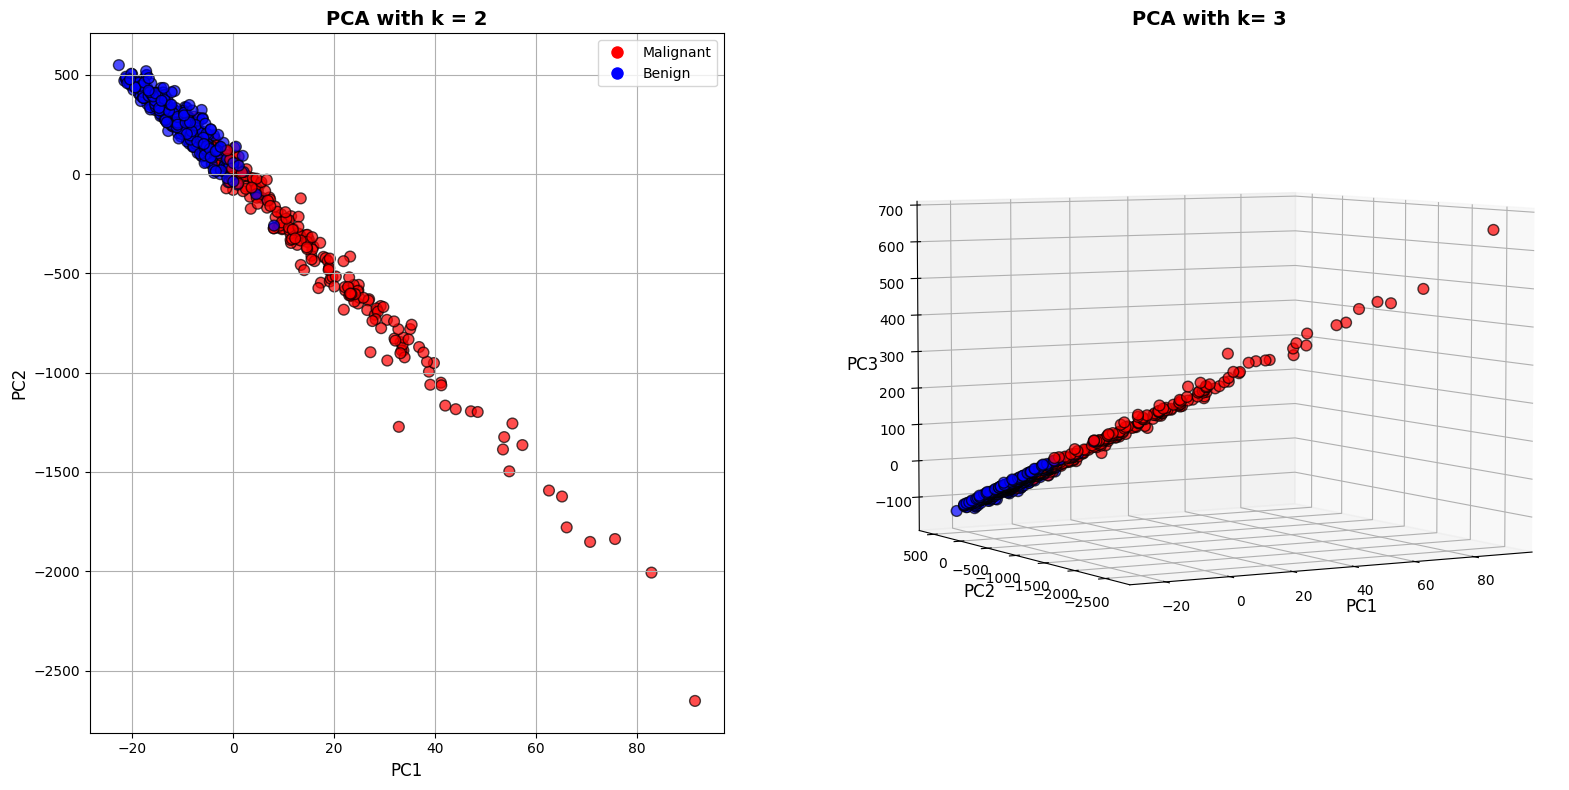

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib import gridspec
colors = {
    'M':'red',
    'B':'blue',
}
labels = Y.map(colors)

fig = plt.figure(figsize=(18, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.8])

ax2d = fig.add_subplot(gs[0])
ax2d.scatter(X_pca2[:,0], X_pca2[:,1], c=labels, alpha=0.7, edgecolors='k', s=60)
ax2d.set_title('PCA with k = 2', fontsize=14, fontweight='bold')
ax2d.set_xlabel('PC1', fontsize=12)
ax2d.set_ylabel('PC2', fontsize=12)
ax2d.grid(True)
custom_legend = [
    Line2D([0], [0], marker='o', color='w', label='Malignant', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Benign', markerfacecolor='blue', markersize=10)
]
ax2d.legend(handles=custom_legend)

ax3d = fig.add_subplot(gs[1],projection='3d')
ax3d.scatter(X_pca3[:,0],X_pca3[:,1],X_pca3[:,2],c = labels, alpha=0.7, edgecolors='k', s=60)
ax3d.set_title('PCA with k= 3', fontsize=14, fontweight='bold')
ax3d.set_xlabel('PC1', fontsize=12)
ax3d.set_ylabel('PC2', fontsize=12)
ax3d.set_zlabel('PC3', fontsize=12)
ax3d.view_init(elev=5, azim=240)

plt.tight_layout()
plt.show()